### 변수가 여러개일 때는 어떻게 될까?

In [2]:
import numpy as np
from pandas import read_excel
from scipy import stats

from pandas import DataFrame

import sys
import seaborn as sb
from matplotlib import pyplot as plt

import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

R 패키지인 ggplot2에 내장된 샘플 데이터로 자동차 32종의 11개 속성에 대한 정보를 담고 있는 데이터

필드	| 설명
|--|--|
mpg	| 연료 효율성 (마일 당 갤런)
cyl	| 실린더 수
disp	| 배기량 (cubic inches)
hp	| 마력 (horsepower)
drat	| 후륜축 비율 (rear axle ratio)
wt	| 차량 무게 (1000 파운드)
qsec	| 1/4 마일 달성 시간 (초)
vs| 	V/S (V 엔진 형태인지, S는 직렬 엔진 형태인지를 나타냄)
am	| 변속기 형태 (0: 자동, 1: 수동)
gear	| 전진 기어 수 (전송 기어)
carb	| 기화기 개수 (carburetors)

In [3]:
df = read_excel("https://data.hossam.kr/E03/mtcars.xlsx", index_col='name')
df.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [4]:
df2 = df.filter(['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs'])
df2['vs']=df2['vs'].astype('category')
df2

,mpg,disp,hp,drat,wt,qsec,vs
name,,,,,,,
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46,0
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02,0
Datsun 710,22.8,108.0,93,3.85,2.320,18.61,1
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44,1
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02,0
Valiant,18.1,225.0,105,2.76,3.460,20.22,1
Duster 360,14.3,360.0,245,3.21,3.570,15.84,0
Merc 240D,24.4,146.7,62,3.69,3.190,20.00,1
Merc 230,22.8,140.8,95,3.92,3.150,22.90,1


### 산점도 행렬


각 변수들을 교차로 표현한 산점도 그래프의 묶음

카테고리타입은 알아서 걸러진다. 

diag = 대각선에 뭐 그려줄지.


In [5]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['axes.unicode_minus'] = False

#### 1 기본 사용

대각 원소자리에 히스토그램이 표현된다.
pairplot() 메서드에 diag_kind='hist'를 적용 (기본값이므로 생략시 자동 적용)
카테고리 타입은 자동으로 제외됨
대각 원소 자리에 히스토그램이 표현된다. 
pairplot 메서드에 히스토그램 적용 

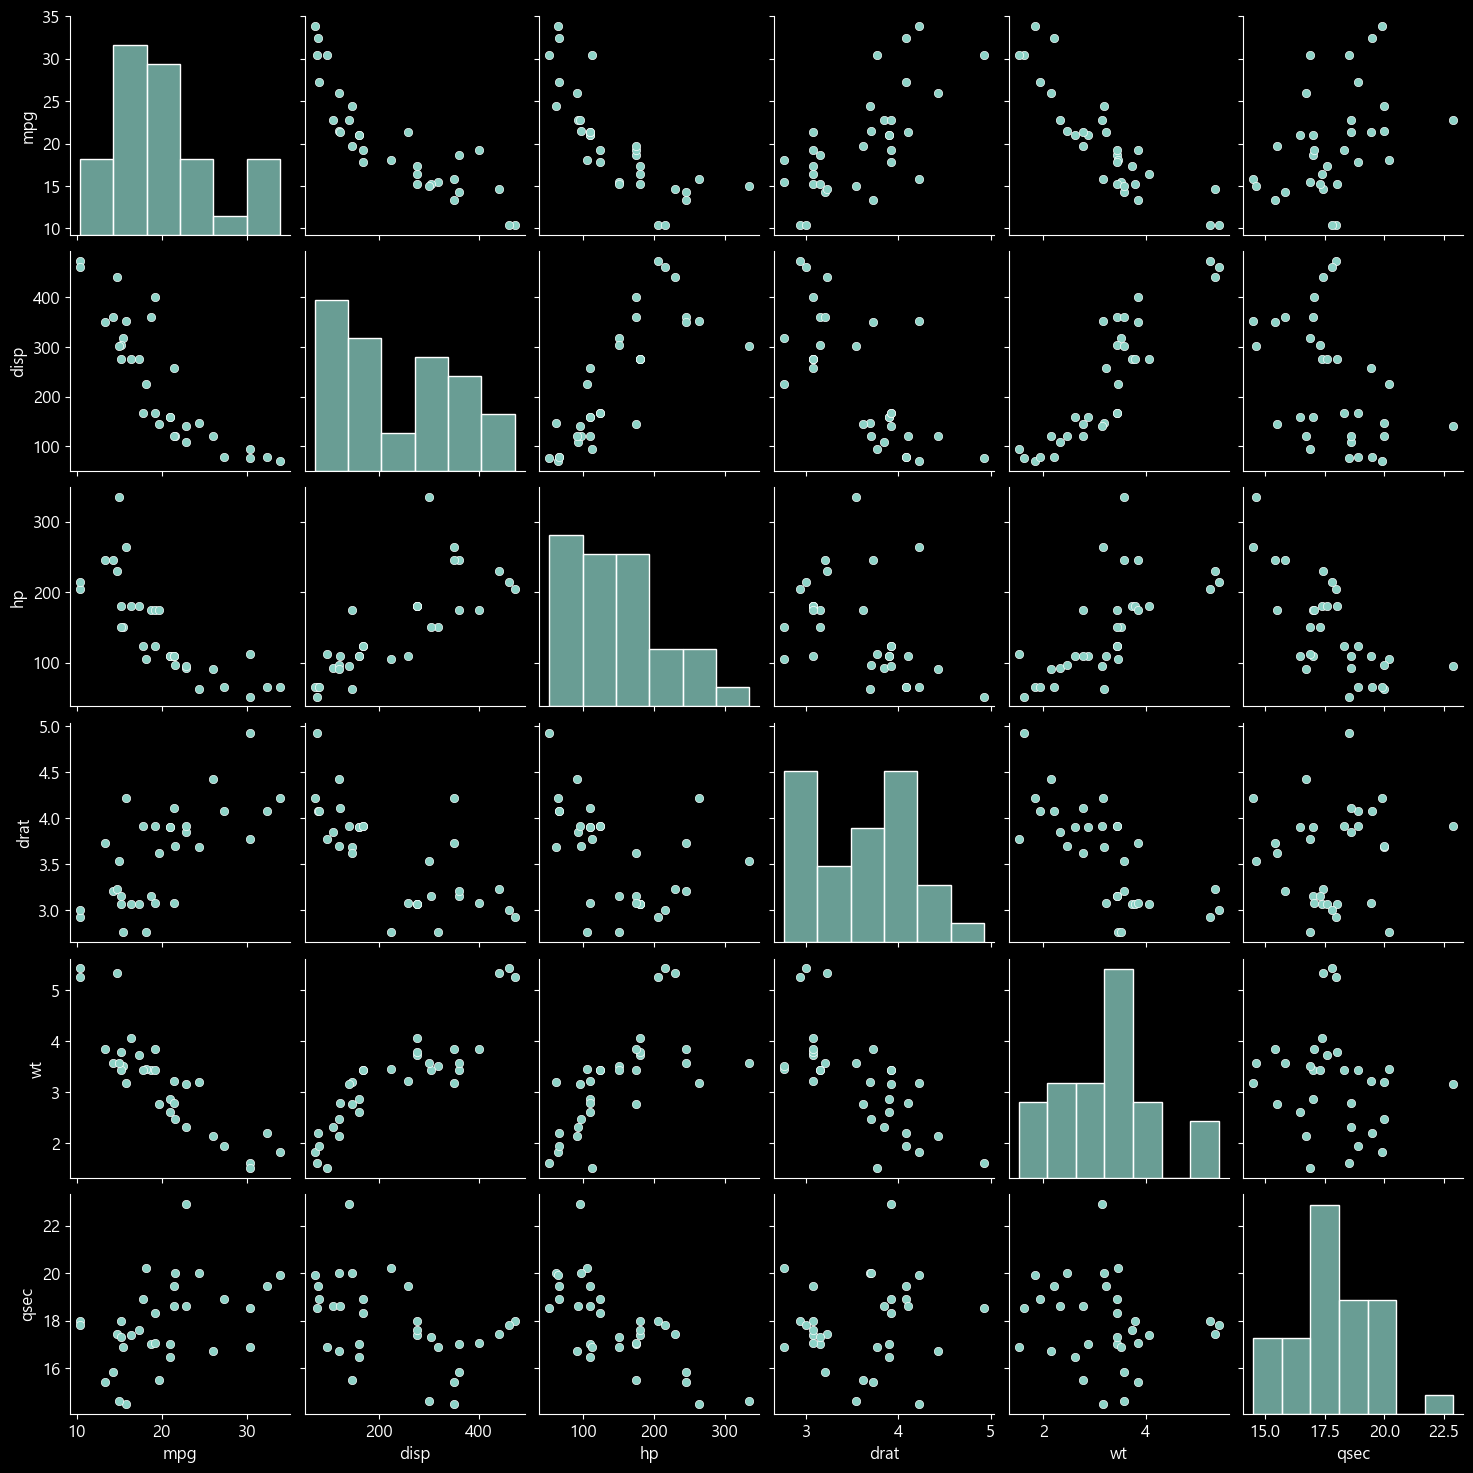

In [6]:
sb.pairplot(df2)
plt.show()
plt.close()

### 파라미터 설정

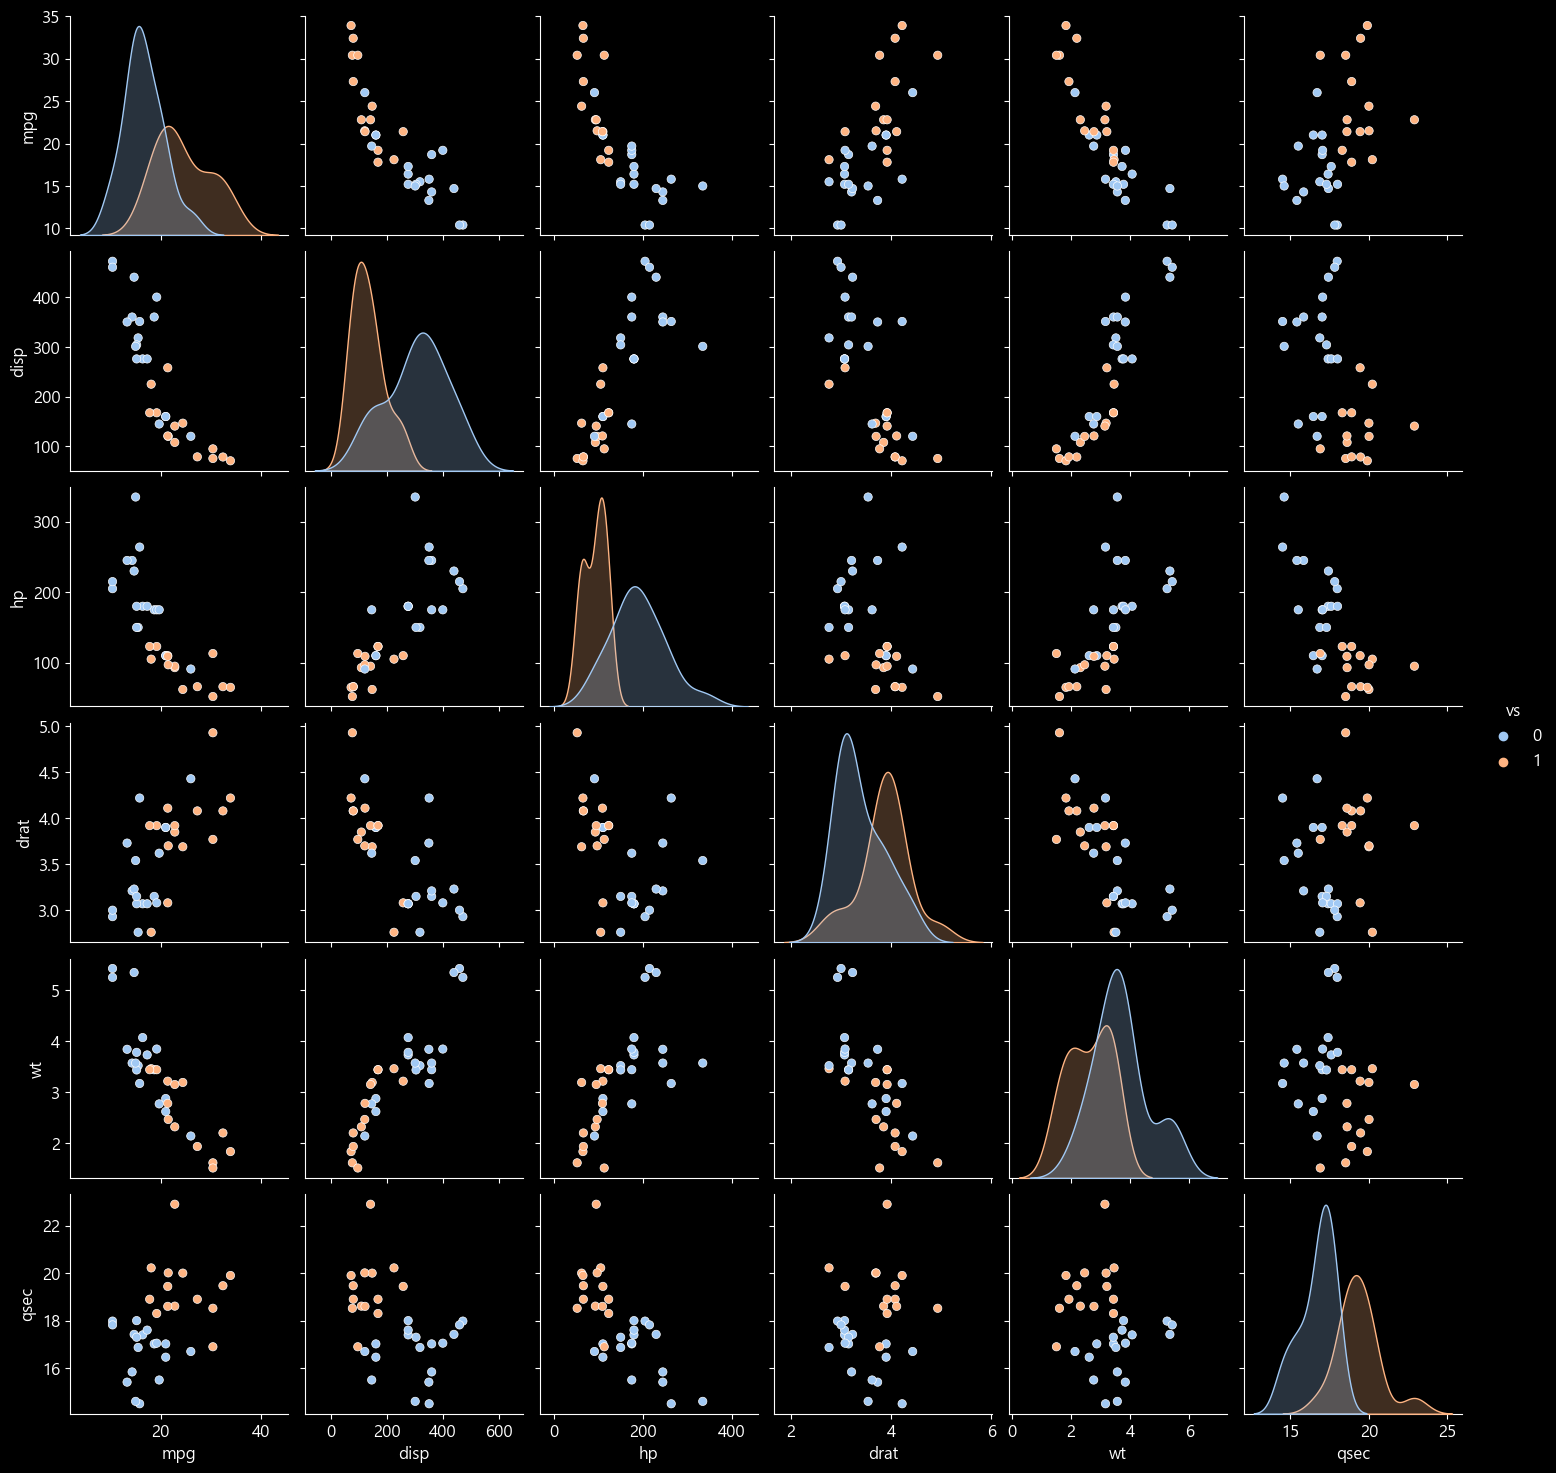

In [7]:
sb.pairplot(df2,
              diag_kind='kde',  # 대각선에 커널밀도분포 표시
              hue='vs',  # 범주별 색상 구분
              palette='pastel'  # pastel, bright, deep, muted, colorblind, dark
)
plt.show()
plt.close()

### 대각선 기준 다르게 표현하기
대각선 위 : 2차원 밀도함수 + 후세선
대각선 아래 : 2차원 밀도함수 + 산포도

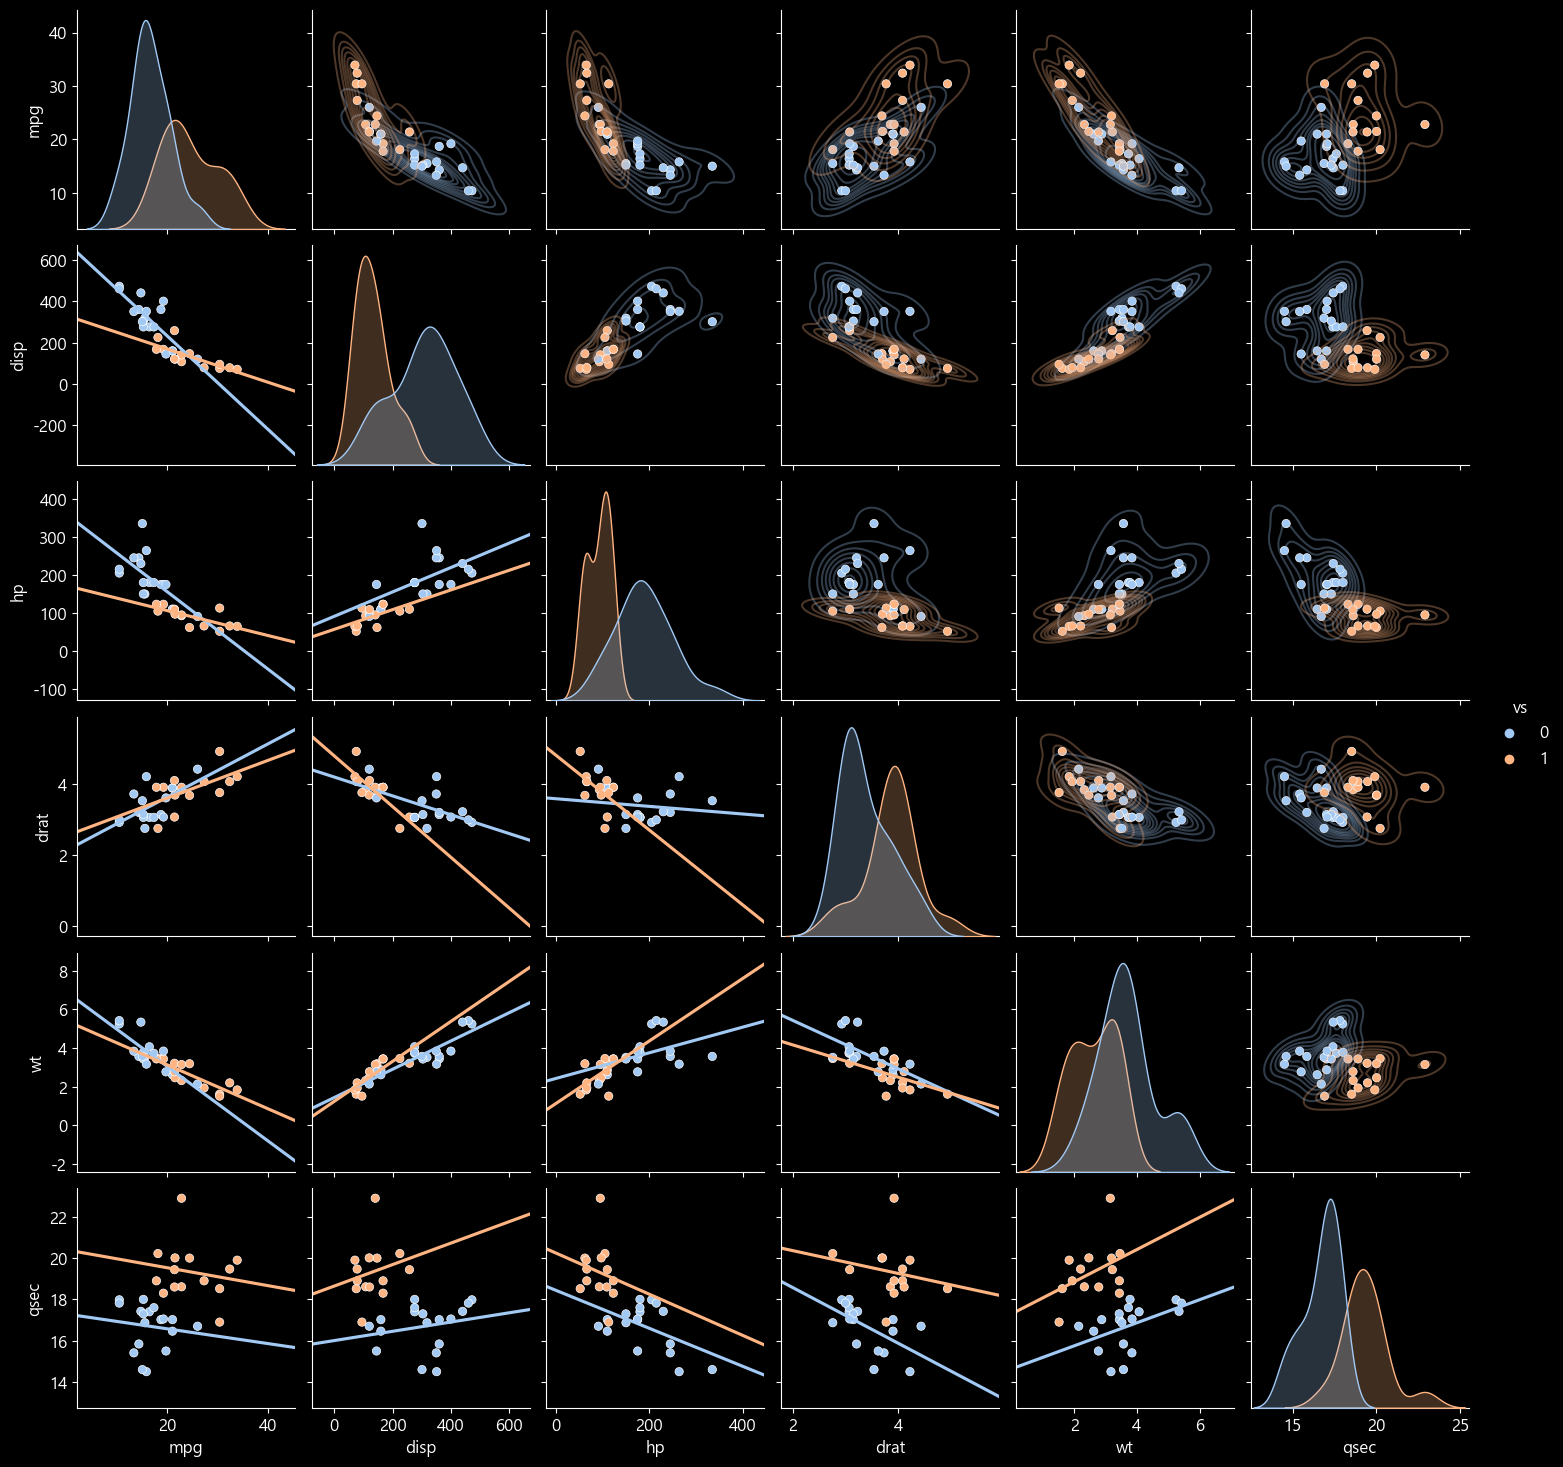

In [8]:
# g객체에 담음 

g = sb.pairplot(df2,
              diag_kind='kde',  # 대각선에 커널밀도분포 표시
              hue='vs',  # 범주별 색상 구분
              palette='pastel'  # pastel, bright, deep, muted, colorblind, dark
)
# 대각선 다르게 표현하기
g.map_upper(sb.kdeplot, alpha=0.3)
g.map_lower(sb.regplot, scatter=False, truncate=False, ci=False)

plt.show()
plt.close()

In [9]:
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# plotly + cufflinks in offline mode
from plotly.offline import iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

In [10]:
fig = ff.create_scatterplotmatrix(
    df2, 
    height=1200,
    width=1200,
    diag='histogram')  # scatter, histogram, box

iplot(fig)

웹브라우저 형태라서  python 코드에서는 어렵고 주피터에서 사용한다. 마우스를 가져다 대면 설명도 해주긴 하는데... 속도가 느리고 약간 겉멋st라서 실무에선 활용하지 않는다. (+범주형을 걸러내지 못한다. )

### 상관계수 행렬

여러개의 변수를 갖는 데이터프레임에 대해서도 사용 가능

In [11]:
df3 = df2.drop('vs',axis=1)
corr = df3.corr(method='pearson')
corr

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


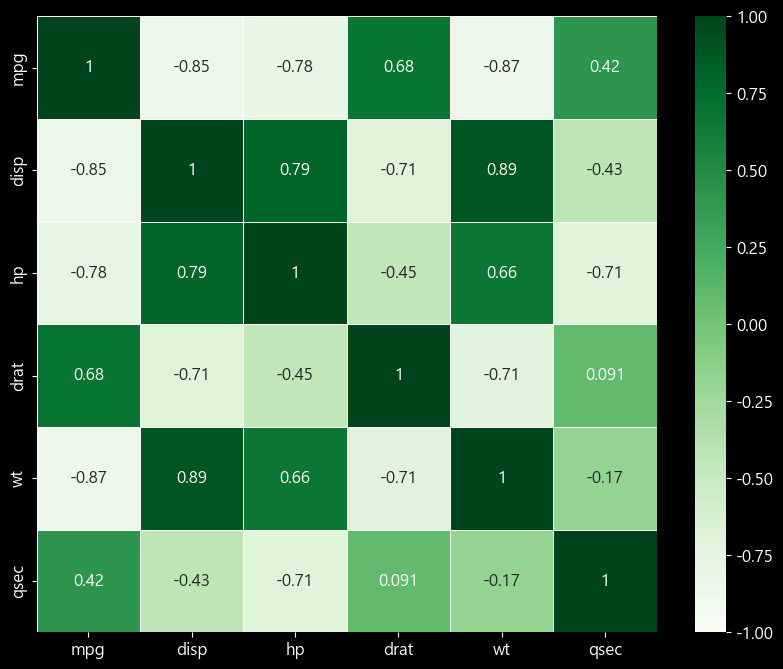

In [12]:
# 산점도 행렬 시각화

plt.rcParams["figure.figsize"] = (10,8)
sb.heatmap(df3.corr(method='pearson'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

분석결과 검정

In [13]:
print(stats.pearsonr(df3['mpg'],df3['disp']))
print(stats.pearsonr(df3['disp'],df3['hp']))

# 이러면 노가다...

PearsonRResult(statistic=-0.8475513792624787, pvalue=9.380326537381379e-10)
PearsonRResult(statistic=0.7909485863698065, pvalue=7.14267865573725e-08)


반복문을 통한 일괄 검정

In [14]:
names = df3.columns
n = len(names)
pv = 0.05 # p-value

In [15]:
data = []
for i in range(0,n) :
    # i 다음과 i를 비교하지만, 맨 끝은 맨 처음과 비교해야 하므로 i가 마지막 인덱스일 경우 0으로 설정한다.
    j = i + 1 if n < n-1 else 0
    fields = names[i] + 'vs' + names[j]

    s,p = stats.pearsonr(df3[names[i]],df3[names[j]])
    result = p < pv

    data.append({'fields':fields,'statistic':s,'pvalue':p,'result':result})

rdf = DataFrame(data) 
rdf.set_index('fields',inpalce=True) 
rdf 

TypeError: DataFrame.set_index() got an unexpected keyword argument 'inpalce'

상관분석 모듈 기능 확인

In [ ]:
pearson_r(df3)